In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv(r"C:\Users\adnan\Downloads\playground-series-s5e3\train.csv")

In [3]:
df_train.sample(10)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
1403,1403,76,1016.7,26.7,23.1,22.3,21.1,81.0,83.0,6.9,40.0,16.6,1
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
524,524,160,1005.7,33.0,30.0,28.4,25.9,80.0,88.0,1.0,220.0,12.8,1
1759,1759,300,1018.9,24.5,23.7,20.4,16.0,93.0,88.0,2.9,50.0,25.0,1
1344,1344,250,1010.5,30.8,28.2,26.1,25.2,83.0,81.0,2.1,140.0,25.1,1
255,255,256,1010.2,29.2,27.0,25.7,25.4,79.0,67.0,4.5,80.0,44.7,1
1950,1950,126,1010.1,29.2,26.6,24.1,22.1,89.0,87.0,2.6,220.0,23.7,1
2084,2084,260,1005.7,27.9,26.1,25.9,24.5,94.0,87.0,2.2,20.0,35.8,1
1212,1212,118,1013.0,28.6,25.5,24.8,22.2,76.0,74.0,6.0,60.0,9.2,1
992,992,263,1005.7,28.2,25.5,23.4,20.6,84.0,89.0,2.0,20.0,23.4,1


In [4]:
df_train.set_index('day', inplace=True)


In [5]:
df_train.reset_index(drop=True, inplace=True)

In [6]:
df_train.shape

(2190, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 205.4 KB


In [8]:
df_train.describe()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [9]:
df_train.isnull().sum()

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

<Axes: >

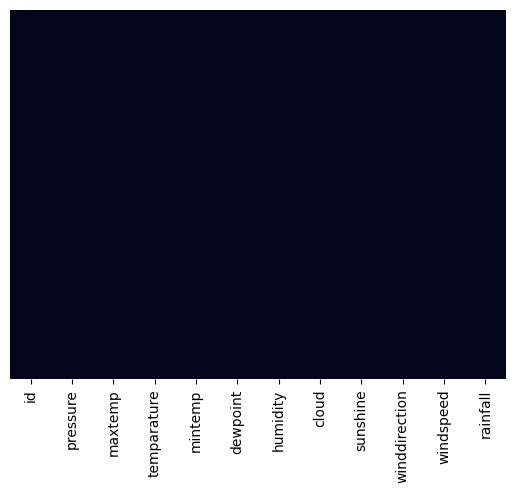

In [10]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [11]:
df_train['rainfall'].value_counts(normalize=True)

rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64

In [12]:
def detect_outliers(df, column_name):

    percentile_25 = df[column_name].quantile(0.25)

  
    percentile_75 = df[column_name].quantile(0.75)

   
    iqr = percentile_75 - percentile_25


    lower_limit = percentile_25 - 1.5 * iqr
    upper_limit = percentile_75 + 1.5 * iqr

    print('lower_limit :', lower_limit)
    print('upper_limit :', upper_limit)
  
    outliers = df_train[(df_train[column_name] <= lower_limit) | (df_train[column_name] >= upper_limit)]

    print(f"number of the rows in '{column_name}' containing outliers: {len(outliers)}")

    return outliers

In [13]:
outliers = detect_outliers(df_train, 'dewpoint')

lower_limit : 4.500000000000002
upper_limit : 37.3
number of the rows in 'dewpoint' containing outliers: 26


In [14]:
outliers = detect_outliers(df_train, 'pressure')

lower_limit : 994.8375000000001
upper_limit : 1031.5375
number of the rows in 'pressure' containing outliers: 4


In [15]:
outliers = detect_outliers(df_train, 'maxtemp')

lower_limit : 6.450000000000003
upper_limit : 46.05
number of the rows in 'maxtemp' containing outliers: 0


In [16]:
outliers = detect_outliers(df_train, 'mintemp')

lower_limit : 4.65
upper_limit : 39.449999999999996
number of the rows in 'mintemp' containing outliers: 1


In [17]:
outliers = detect_outliers(df_train, 'humidity') 

lower_limit : 60.5
upper_limit : 104.5
number of the rows in 'humidity' containing outliers: 28


In [18]:
outliers = detect_outliers(df_train, 'cloud')

lower_limit : 40.5
upper_limit : 116.5
number of the rows in 'cloud' containing outliers: 129


In [19]:
outliers = detect_outliers(df_train, 'sunshine')

lower_limit : -9.2
upper_limit : 16.4
number of the rows in 'sunshine' containing outliers: 0


In [20]:
outliers = detect_outliers(df_train, 'windspeed')

lower_limit : -6.537499999999998
upper_limit : 48.5625
number of the rows in 'windspeed' containing outliers: 28


In [21]:
df_train['temperature_range'] = df_train['maxtemp'] - df_train['mintemp']
df_train.head()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temperature_range
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1


In [22]:
df_train.head()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temperature_range
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1


In [23]:
y = df_train['rainfall']

X=df_train.drop(['rainfall','id'],axis=1)
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)

In [24]:

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [25]:
model = RandomForestClassifier(random_state=42)

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_val_pred = model.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_pred)

In [28]:
print(f'ROC-AUC (Validation Data): {roc_auc_val}')

ROC-AUC (Validation Data): 0.8771151121113612


In [29]:
###هذه النتيجه باستخدام الغابه العشوائيه بدون ضبط المعلمات  (0.88)

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,5,6]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=6, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 500 candidates, totalling 3000 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=2)

In [31]:

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

 
model_optimized = RandomForestClassifier(**best_params, random_state=42)
model_optimized.fit(X_train, y_train)


y_test_pred_optimized = model_optimized.predict_proba(X_test)[:, 1]
roc_auc_test_optimized = roc_auc_score(y_test, y_test_pred_optimized)
print(f'ROC-AUC (Test Data): {roc_auc_test_optimized}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400}
ROC-AUC (Test Data): 0.8780864197530865


In [32]:
###هذه النتيجه باستخدام الغابه العشوائيه بعد ضبط المعلمات  (0.875)

In [33]:
# استخدام xgboost بدون ضبط معاملات

In [34]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)


In [35]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [36]:
y_val_pred = xgb.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_pred)
print(f'ROC-AUC (Validation Data): {roc_auc_val}')

ROC-AUC (Validation Data): 0.8508793865132949


In [37]:
##xgboost مع استخدام ضبط للمعاملات  

In [38]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01,0.03, 0.05, 0.1],
    'max_depth': [3,5,7,9,None],
}

In [39]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\adnan\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\adnan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=2)

In [40]:

grid_search.best_score_


0.8659478542865855

In [41]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
df_test =pd.read_csv(r"C:\Users\adnan\Downloads\playground-series-s5e3\test.csv")

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [44]:
df_train

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temperature_range
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,4.1
2186,2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,0.9
2187,2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,4.7
2188,2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1,2.6


In [45]:

df_t = df_train.drop(columns=['id'])


print(df_t.head())


   pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  rainfall  temperature_range  
0       1.1           60.0       17.2         1                1.3  
1       0.0           50.0       21.9         1                0.4  
2       8.3           70.0       18.1         1                4.8  
3       0.0           60.0       35.6         1                1.2  
4       3.6           40.0       24.8         0                6.1  


In [46]:
df_t.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temperature_range
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1


In [47]:
df_t['temperature_range'] = df_t['maxtemp'] - df_t['mintemp']

In [48]:
df_t

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temperature_range
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,4.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,0.9
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,4.7
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1,2.6


In [49]:
X_with_originals = df_t[['maxtemp', 'mintemp', 'temperature_range', 'pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
y_with_originals = df_t['rainfall']

In [50]:
X_train_full_t,X_test_t,y_train_full_t,y_test_t = train_test_split(X_with_originals,y_with_originals,stratify=y,test_size=0.20,random_state=42)

In [51]:
X_train_o, X_val_o, y_train_o, y_val_o = train_test_split(X_train_full_t, y_train_full_t, test_size=0.2, random_state=42)

In [52]:
model_o= RandomForestClassifier(random_state=42)

In [53]:
model_o.fit(X_train_o, y_train_o)

RandomForestClassifier(random_state=42)

In [54]:
y_val_pred = model_o.predict_proba(X_val_o)[:, 1]
roc_auc_val = roc_auc_score(y_val_o, y_val_pred)

print(f'ROC AUC Score: {roc_auc_val:.2f}')

ROC AUC Score: 0.88


In [55]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,5,6]
}
grid_search = GridSearchCV(estimator=model_o, param_grid=param_grid, scoring='roc_auc', cv=6, n_jobs=-1, verbose=2)
grid_search.fit(X_train_o, y_train_o)

Fitting 6 folds for each of 500 candidates, totalling 3000 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=2)

In [56]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

 
model_optimized = RandomForestClassifier(**best_params, random_state=42)
model_optimized.fit(X_train_o, y_train_o)


y_test_pred_optimized = model_optimized.predict_proba(X_val_o)[:, 1]
roc_auc_test_optimized = roc_auc_score(y_val_o, y_test_pred_optimized)
print(f'ROC-AUC (Test Data): {roc_auc_test_optimized}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 300}
ROC-AUC (Test Data): 0.8780528465449695


In [57]:
X_with_originall = df_t[['temperature_range', 'pressure', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
y_with_originall = df_t['rainfall']

In [58]:
X_train_fu_t,X_test_tt,y_train_fu_t,y_test_tt = train_test_split(X_with_originall,y_with_originall,stratify=y,test_size=0.20,random_state=42)

In [59]:
X_train_oo, X_val_oo, y_train_oo, y_val_oo = train_test_split(X_train_fu_t, y_train_fu_t, test_size=0.2, random_state=42)

In [60]:
model_oo= RandomForestClassifier(random_state=42)

In [61]:
model_oo.fit(X_train_oo, y_train_oo)

RandomForestClassifier(random_state=42)

In [62]:
y_val_pred = model_oo.predict_proba(X_val_oo)[:, 1]
roc_auc_val = roc_auc_score(y_val_oo, y_val_pred)

print(f'ROC AUC Score: {roc_auc_val:.2f}')

ROC AUC Score: 0.88


In [63]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,5,6]
}
grid_search = GridSearchCV(estimator=model_oo, param_grid=param_grid, scoring='roc_auc', cv=6, n_jobs=-1, verbose=2)
grid_search.fit(X_train_oo, y_train_oo)

Fitting 6 folds for each of 500 candidates, totalling 3000 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=2)

In [64]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

 
model_optimized = RandomForestClassifier(**best_params, random_state=42)
model_optimized.fit(X_train_oo, y_train_oo)


y_test_pred_optimized = model_optimized.predict_proba(X_val_oo)[:, 1]
roc_auc_test_optimized = roc_auc_score(y_val_oo, y_test_pred_optimized)
print(f'ROC-AUC (Test Data): {roc_auc_test_optimized}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC (Test Data): 0.878177877802784
